In [3]:
import cv2
import dlib

# 加载人脸检测器和关键点检测器
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# 读取图像
image_path = '../data/processed/1/1_0.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 人脸检测
faces = face_detector(gray)

# 遍历检测到的人脸
for face in faces:
    # 获取关键点
    landmarks = landmark_predictor(gray, face)
    
    # 在图像上绘制关键点
    for i in range(68):
        x, y = landmarks.part(i).x, landmarks.part(i).y
        cv2.circle(image, (x, y), 1, (0, 0, 255), 2)

# 显示结果
cv2.imshow('Facial Landmarks Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

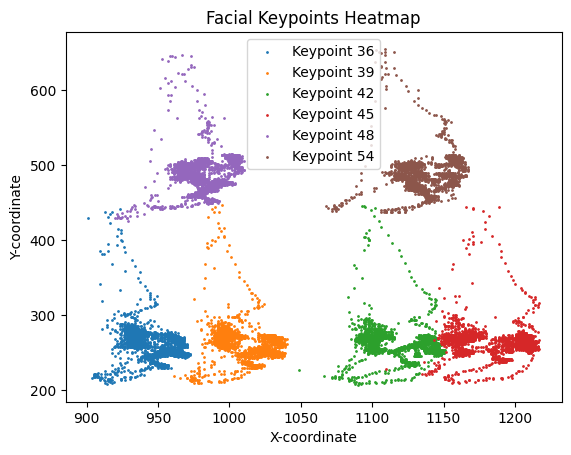

In [3]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# 加载人脸检测器和关键点检测器
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# 打开视频文件（或者替换成摄像头捕捉）
video_path = '../data/raw/android/20230517_192201.mp4'
cap = cv2.VideoCapture(video_path)

# 设置帧率为每秒10帧
fps = 10
cap.set(cv2.CAP_PROP_FPS, fps)

# 定义要记录的关键点索引
keypoints_to_record = [36, 39, 42, 45, 48, 54]

# 初始化用于记录关键点位置范围的列表
keypoints_positions = {i: [] for i in keypoints_to_record}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 将图像转为灰度
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 人脸检测
    faces = face_detector(gray)

    # 遍历检测到的人脸
    for face in faces:
        # 获取关键点
        landmarks = landmark_predictor(gray, face)

        # 在图像上绘制关键点
        for i in keypoints_to_record:
            x, y = landmarks.part(i).x, landmarks.part(i).y
            cv2.circle(frame, (x, y), 1, (0, 0, 255), 2)
        
        # 记录特殊点位置
        for i in keypoints_to_record:
            x, y = landmarks.part(i).x, landmarks.part(i).y
            keypoints_positions[i].append((x, y))

    # 显示结果
    cv2.imshow('Facial Landmarks Detection', frame)

    # 按下'q'键退出
    if cv2.waitKey(1000 // fps) & 0xFF == ord('q'):
        break


# 释放资源
cap.release()
cv2.destroyAllWindows()

# 绘制热图
for keypoint, positions in keypoints_positions.items():
    x, y = zip(*positions)
    plt.scatter(x, y, s=1, label=f'Keypoint {keypoint}')

plt.title('Facial Keypoints Heatmap')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()

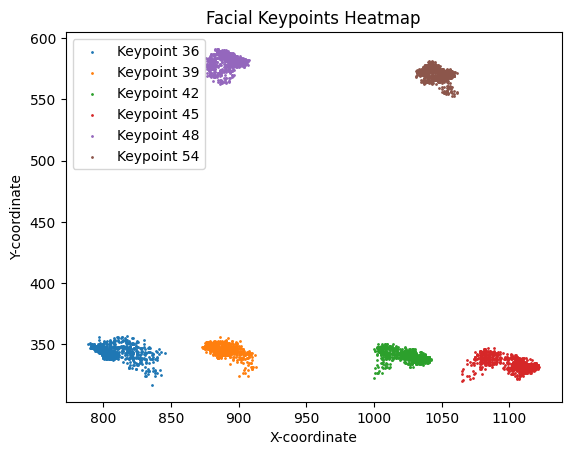

In [4]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# 加载人脸检测器和关键点检测器
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# 打开视频文件（或者替换成摄像头捕捉）
video_path = '../data/raw/android/20230514_193704.mp4'
cap = cv2.VideoCapture(video_path)

# 设置帧率为每秒10帧
fps = 10
cap.set(cv2.CAP_PROP_FPS, fps)

# 定义要记录的关键点索引
keypoints_to_record = [36, 39, 42, 45, 48, 54]

# 初始化用于记录关键点位置范围的列表
keypoints_positions = {i: [] for i in keypoints_to_record}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 将图像转为灰度
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 人脸检测
    faces = face_detector(gray)

    # 遍历检测到的人脸
    for face in faces:
        # 获取关键点
        landmarks = landmark_predictor(gray, face)

        # 在图像上绘制关键点
        for i in keypoints_to_record:
            x, y = landmarks.part(i).x, landmarks.part(i).y
            cv2.circle(frame, (x, y), 1, (0, 0, 255), 2)
        
        # 记录特殊点位置
        for i in keypoints_to_record:
            x, y = landmarks.part(i).x, landmarks.part(i).y
            keypoints_positions[i].append((x, y))

    # 显示结果
    cv2.imshow('Facial Landmarks Detection', frame)

    # 按下'q'键退出
    if cv2.waitKey(1000 // fps) & 0xFF == ord('q'):
        break


# 释放资源
cap.release()
cv2.destroyAllWindows()

# 绘制热图
for keypoint, positions in keypoints_positions.items():
    x, y = zip(*positions)
    plt.scatter(x, y, s=1, label=f'Keypoint {keypoint}')

plt.title('Facial Keypoints Heatmap')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()